## Inference MMrotate

In [1]:
# Check MMRotate
import mmrotate
print(mmrotate.__version__)

# Check MMDetection
import mmdet
print(mmdet.__version__)

# Check mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

/home/ubuntu/.conda/envs/article-009/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.3.4
2.28.2
10.1
GCC 7.3


In [7]:
import os, sys
sys.path.append('mmrotate/')
from glob import glob
import matplotlib.pyplot as plt

import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import show_result_pyplot, inference_detector
from mmrotate.models import build_detector
from mmrotate.apis import inference_detector_by_patches

In [3]:

# Choose to use a config and initialize the detector
config = 'work_dirs/oriented_reppoints_segs/oriented_reppoints_segs.py'
# Setup a checkpoint file to load
checkpoint = 'work_dirs/oriented_reppoints_segs/epoch_30.pth'

# Set the device to be used for evaluation
device='cuda:0'

os.environ['FORCE_CUDA'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['MMCV_WITH_OPS'] = '1'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint)
print('Model Load')

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: work_dirs/oriented_reppoints_segs/epoch_30.pth
Model Load


RotatedRepPoints(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [5]:
# Use the detector to do inference
img = '../sample/train_scale1_h640_w640_oh0.5_ow0.5_min1_segs/maxar_001_0_4480_640_5120.jpg'
result = inference_detector(model, img)

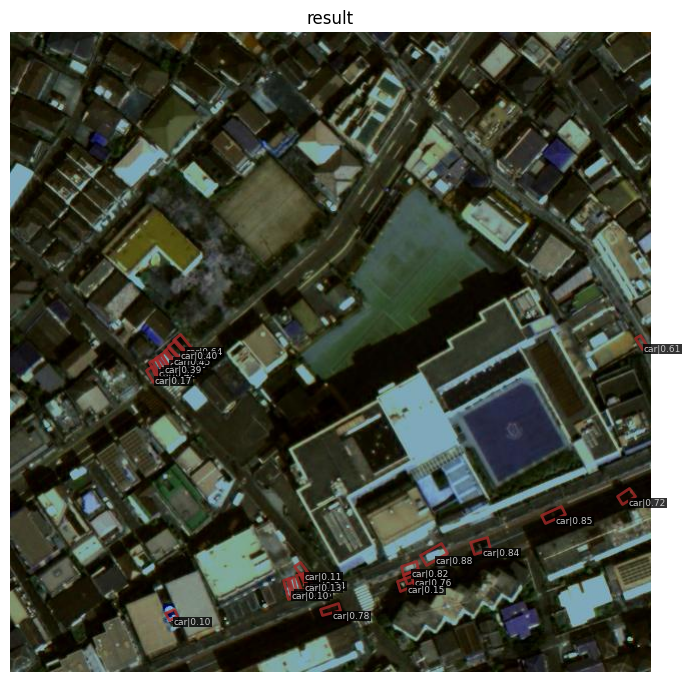

In [24]:
# Let's plot the result
show_result_pyplot(model, img, result, 
                   score_thr=0.1, palette='dota', 
                #    out_file='output/003/result.png',
                   )

In [30]:
NUM_PLOT = 32
PATHS_IMG = sorted(glob('../sample/train_scale1_h640_w640_oh0.5_ow0.5_min1_segs/*.jpg'))[:NUM_PLOT]

for i, PATH in enumerate(PATHS_IMG):
    file_name = os.path.basename(PATH)
    print(i, 'th -> inference:', file_name)
    result = inference_detector(model, PATH)
    show_result_pyplot(model, PATH, result, 
                   score_thr=0.1, 
                   palette='dota', 
                   out_file=f'output/003/{file_name}.png',
                   );

0 th -> inference: maxar_001_0_0_640_640.jpg
1 th -> inference: maxar_001_0_1280_640_1920.jpg
2 th -> inference: maxar_001_0_1600_640_2240.jpg
3 th -> inference: maxar_001_0_1920_640_2560.jpg
4 th -> inference: maxar_001_0_2240_640_2880.jpg
5 th -> inference: maxar_001_0_2560_640_3200.jpg
6 th -> inference: maxar_001_0_2880_640_3520.jpg
7 th -> inference: maxar_001_0_3200_640_3840.jpg
8 th -> inference: maxar_001_0_320_640_960.jpg
9 th -> inference: maxar_001_0_3520_640_4160.jpg
10 th -> inference: maxar_001_0_3840_640_4480.jpg
11 th -> inference: maxar_001_0_4160_640_4800.jpg
12 th -> inference: maxar_001_0_4480_640_5120.jpg
13 th -> inference: maxar_001_0_4800_640_5440.jpg
14 th -> inference: maxar_001_0_5120_640_5760.jpg
15 th -> inference: maxar_001_0_5440_640_6080.jpg
16 th -> inference: maxar_001_0_5760_640_6400.jpg
17 th -> inference: maxar_001_0_6080_640_6720.jpg
18 th -> inference: maxar_001_0_6400_640_7040.jpg
19 th -> inference: maxar_001_0_640_640_1280.jpg
20 th -> inferenc